<a href="https://colab.research.google.com/github/Huyyuh2000/Hello-World-TinyML/blob/main/Hello_World_TinyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

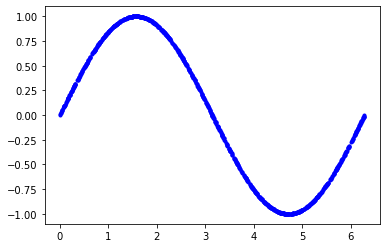

In [ ]:
# Generating data
SAMPLES = 1000

SEED = 1337

np.random.seed(SEED)
tf.random.set_seed(SEED)

x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

np.random.shuffle(x_values)

y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')
plt.show()

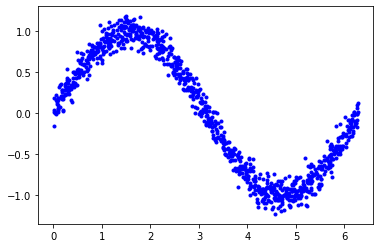

In [ ]:
# Add some noise
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

<function matplotlib.pyplot.show>

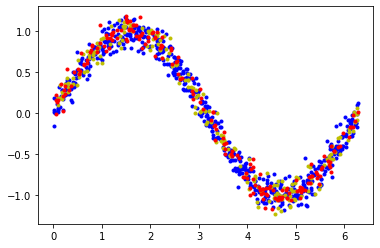

In [ ]:
# split data

TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT,TEST_SPLIT])

assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.show

In [ ]:
from tensorflow.keras import layers

model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 0s 95us/sample - loss: 0.1594 - mae: 0.3264 - val_loss: 0.1628 - val_mae: 0.3305
Epoch 2/1000
600/600 [==============================] - 0s 114us/sample - loss: 0.1594 - mae: 0.3266 - val_loss: 0.1630 - val_mae: 0.3310
Epoch 3/1000
600/600 [==============================] - 0s 100us/sample - loss: 0.1605 - mae: 0.3277 - val_loss: 0.1621 - val_mae: 0.3283
Epoch 4/1000
600/600 [==============================] - 0s 103us/sample - loss: 0.1591 - mae: 0.3258 - val_loss: 0.1624 - val_mae: 0.3296
Epoch 5/1000
600/600 [==============================] - 0s 89us/sample - loss: 0.1603 - mae: 0.3269 - val_loss: 0.1624 - val_mae: 0.3298
Epoch 6/1000
600/600 [==============================] - 0s 118us/sample - loss: 0.1596 - mae: 0.3261 - val_loss: 0.1655 - val_mae: 0.3338
Epoch 7/1000
600/600 [==============================] - 0s 110us/sample - loss: 0.1588 - mae: 0.3264 - val_loss: 0.1624 - val_ma

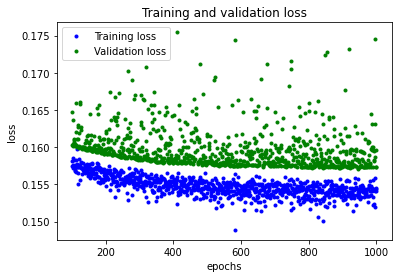

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs[100:], loss[100:], 'b.', label='Training loss')
plt.plot(epochs[100:], val_loss[100:], 'g.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

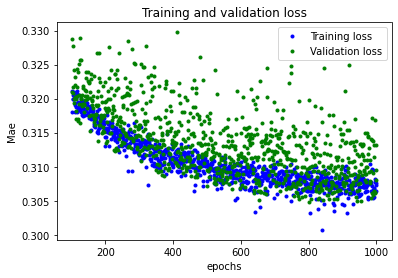

In [ ]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[100:], mae[100:], 'b.', label='Training loss')
plt.plot(epochs[100:], val_mae[100:], 'g.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

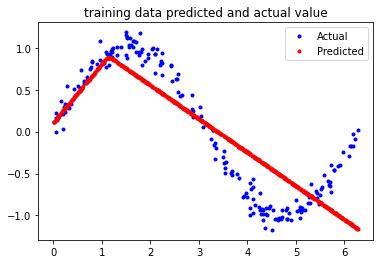

In [ ]:
predictions = model_1.predict(x_train)

plt.clf()
plt.title('training data predicted and actual value')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
model_2.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=[x_validate, y_validate])

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 103us/sample - loss: 0.0938 - mae: 0.0938 - val_loss: 0.1079 - val_mae: 0.1079
Epoch 2/600
600/600 [==============================] - 0s 97us/sample - loss: 0.0930 - mae: 0.0930 - val_loss: 0.0908 - val_mae: 0.0908
Epoch 3/600
600/600 [==============================] - 0s 99us/sample - loss: 0.0912 - mae: 0.0912 - val_loss: 0.0931 - val_mae: 0.0931
Epoch 4/600
600/600 [==============================] - 0s 104us/sample - loss: 0.0925 - mae: 0.0925 - val_loss: 0.0897 - val_mae: 0.0897
Epoch 5/600
600/600 [==============================] - 0s 99us/sample - loss: 0.0939 - mae: 0.0939 - val_loss: 0.0881 - val_mae: 0.0881
Epoch 6/600
600/600 [==============================] - 0s 101us/sample - loss: 0.0925 - mae: 0.0925 - val_loss: 0.0936 - val_mae: 0.0936
Epoch 7/600
600/600 [==============================] - 0s 123us/sample - loss: 0.0928 - mae: 0.0928 - val_loss: 0.0901 - val_mae: 0.090

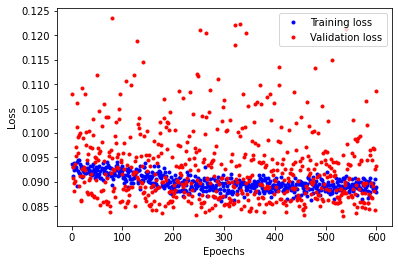

In [ ]:
loss= history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b.', label='Training loss')
plt.plot(epochs, val_loss, 'r.', label='Validation loss')
plt.xlabel('Epoechs')
plt.ylabel('Loss')

plt.legend()
plt.show()

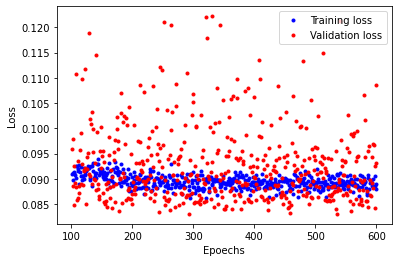

In [ ]:
plt.clf()

loss= history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs[100:], loss[100:], 'b.', label='Training loss')
plt.plot(epochs[100:], val_loss[100:], 'r.', label='Validation loss')
plt.xlabel('Epoechs')
plt.ylabel('Loss')

plt.legend()
plt.show()

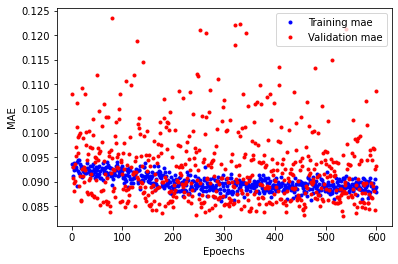

In [ ]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']


plt.plot(epochs, mae, 'b.', label='Training mae')
plt.plot(epochs, val_mae, 'r.', label='Validation mae')
plt.xlabel('Epoechs')
plt.ylabel('MAE')

plt.legend()
plt.show()

200/200 [==============================] - 0s 69us/sample - loss: 0.0873 - mae: 0.0873


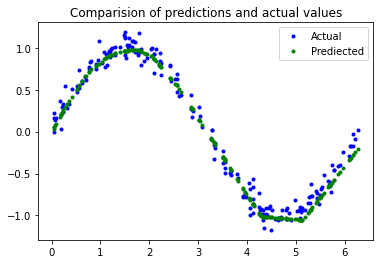

In [ ]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)

plt.clf()
plt.title('Comparision of predictions and actual values')
plt.plot(x_test, y_test,'b.', label="Actual")
plt.plot(x_test, predictions, 'g.', label="Prediected")
plt.legend()
plt.show()

# Convert to tensorflow lite

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:


# Convert the model to tensorflow lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save model to the disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to tensorflow lite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations.
# which inclide quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator

tflite_model = converter.convert()

open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Converted 6 variables to const ops.
INFO:tensorflow:Converted 6 variables to const ops.


2432

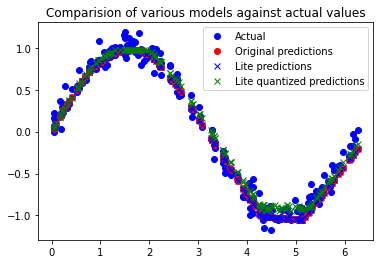

In [ ]:
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]

sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each's model Interpreter for each value and store the result in the arrays
for x_value in x_test:

  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)

  sine_model.set_tensor(sine_model_input_index, x_value_tensor)

  sine_model.invoke()

  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)

  sine_model_quantized.invoke()

  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])
plt.clf()
plt.title("Comparision of various models against actual values")
plt.plot(x_test, y_test, 'bo', label="Actual")
plt.plot(x_test, predictions, 'ro', label="Original predictions")
plt.plot(x_test, sine_model_predictions, 'bx', label="Lite predictions")
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label="Lite quantized predictions")
plt.legend()
plt.show()


# Compare size between quantized and not


In [ ]:
import os 
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantizied model is %d bytes" % basic_model_size)
dif = basic_model_size-quantized_model_size
print("Difference is %d bytes" % dif)

Basic model is 2656 bytes
Quantizied model is 2656 bytes
Difference is 224 bytes


# Converting to C



In [ ]:
# Install xxd if is is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0e, 0x00, 0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x10, 0x09, 0x00, 0x00, 0x58, 0x02, 0x00, 0x00, 0x40, 0x02, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00, 0x30, 0x02, 0x00, 0x00,
  0x1c, 0x02, 0x00, 0x00, 0xf4, 0x01, 0x00, 0x00, 0xa4, 0x01, 0x00, 0x00,
  0x84, 0x01, 0x00, 0x00, 0x7c, 0x01, 0x00, 0x00, 0x6c, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x7c, 0xfd, 0xff, 0xff, 0x80, 0xfd, 0xff, 0xff,
  0x84, 0xfd, 0xff, 0xff, 0x1e, 0xfe, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x40, 0x00, 0x00, 0x00, 0x5c, 0xff, 0xff, 0xff, 0x7d, 0x01, 0x00, 0x00,
  0x64, 0xfd, 0xff, 0xff, 0xf7, 0xff, 0xff, 0xff, 0xf9, 0x02, 0x00, 0x00,
  0xd5, 0x03, 0x00, 0x00, 0x9b, 0x08, 0x00, 0x00, 0xf1, 0xff, 0x